<a href="https://colab.research.google.com/github/gaheehan/study_AI/blob/main/%EB%AA%A8%EB%8D%B8%EC%9D%98_%EA%B2%B0%EA%B3%BC_%EC%B6%9C%EB%A0%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모델의 결과 출력

모델을 훈련 할 때 사용하지 않은 데이터를 이용하여 모델을 평가해야 한다. 이는 모델이 훈련된 데이터에 대해서는 예측을 잘 수행할 수 있지만, 훈련에 사용하지 않은 데이터를 모델에 사용하였을 때 성능이 좋지 않으면 사용할 수 없기 때문이다.

모델이 훈련 후에 훈련되지 않은 데이터로 인해 성능이 저하되는 원인을 먼저 이해해야 한다.이것은 과소적합(underfitting) 또는 과대적합(overfitting)때문일 수 있다.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import tree

## 1. 과소적합 vs 과대적합

###과소적합:
 모델이 너무 단순화되어 데이터를 제대로 설명할 수 없음을 의미
예를들어, 비선형 관계가 있는 데이터가 있지만 선형 모델을 사용하여 학습하는 경우 과소적합이 발생할 수 있다. 이는 선형 모델이 데이터에서 관찰되는 비선형 관계나 추세를 설명할 수 없기 때문. 따라서 과소적합된 모델을 사용하여 예측하면 성능이 저하된다.

### 과대적합:
 반면에 과대적합은 모델이 너무 잘 적합되어서 데이터 세트 내의 모든 노이즈 또는 이상값도 학습했다는 것을 의미. 따라서 훈련된 데이터에 대해 테스트 하면 성능이 매우 우수. 그러나 너무 잘 훈련되었기 때문에 일반화할 수 없으며 훈련되지 않은 데이터에 대해 테스트할 때는 성능이 좋지않다. 

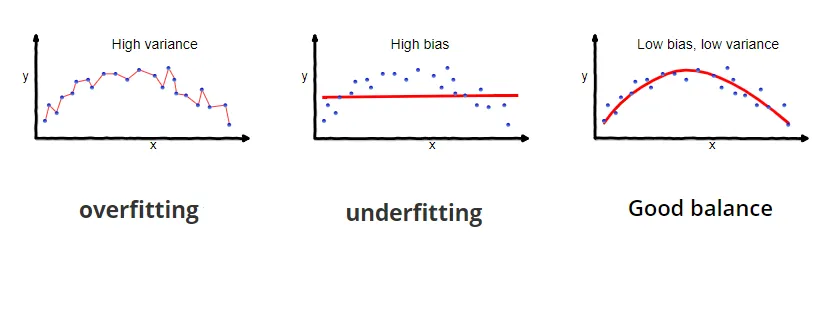
### 편향-분산 트레이드오프의 이해

[참조](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)

- 편향: 모델의 평균 예측과 예측하려는 올바른 값 간의 차이. 바이어스가 높은 모델은 학습 데이터에 주의를 기울이지 않고 모델이 지나치게 단순화된다. 훈련 및 테스트 데이터에서 항상 높은 오류가 발생


- 분산: 주어진 데이터 포인트 또는 데이터의 확산을 알려주는 값에 대한 모델예측의 가변성. 분산이 높은 모델은 교육 데이터에 많은 관심을 기울이고 이전에 본 적 없는 데이터에 대해 일반화하지 않는다. 결과적으로 이러한 모델은 교육 데이터에 대해 매우 잘 수행되지만 테스트 데이터에 대한 오류율이 높다.

지도 학습에서 **과소적합은** 모델이 데이터의 기본 패턴을 캡처할 수 없을 때 발생. 이러한 모델은 일반적으로 바이어스가 높고 분산이 낮다. 정확한 모델을 구축하기 위한 데이터 양이 매우 적거나 비선형 데이터로 선형 모델을 구축하려고 할 때 발생. 또한 이러한 종류의 모델은 선형 및 로지스틱 회귀와 같은 데이터의 복잡한 패턴을 캡처하는 데 매우 간단하다.

지도 학습에서 **과적합은** 모델이 데이터의 기본 패턴과 함께 노이즈를 캡처할 때 발생. 시끄러운 데이터 세트에 대해 모델을 많이 훈련할 때 발생. 이러한 모델은 바이어스가 낮고 분산이 높다. 이러한 모델은 과적합되기 쉬운 결정 트리와 같이 매우 복잡하다.

## 2. 과소적합과 과대적합의 균형 맞추기

과소적합 및 과대적합 사이의 균형을 찾는 것이 중요!

균형을 이루기 위해 할 수 있는 몇 가지 방법이 있다.

## 2.1k-최근접 이웃(K-Nearest Neighbor) 알고리즘

KNN은 문제의 지점에서 가장 가까운 대부분의 다른 지점을 기반으로 데이터 지점을 분류한다. 그러나 알고리즘을 사용하기 위해서는 이웃의 수를 매개변수로 입력해야 한다. 과소적합과 과대적합의 경우 이웃의 수가 중요한 역할을 한다. 이는 이웃의 수가 모델이 과대,과소적합될 가능성을 결정하기 때문. 이웃 수가 많을수록 모델은 과소적합될 가능성이 줄어든다. 이웃 수가 너무 많으면 모델은 과대적합될 가능성이 높다. 따라서 모델이 상대적으로 균형을 이룰 수 있도록 적합한 이웃의 수가 있어야 한다. 이 숫자는 데이터 세트에 따라 달라질 수 있다. Iris Flower 데이터 세트에 대해 이웃의 숫자를 찾아보자!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 데이터 프레임으로 데이터 세트 불러오기

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/review/17/iris.data",header=None)
names = ["sepal_length", "sepal_width", "petal_length", "petal_width","class"]
df.columns = names
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# data의 정보 확인하기

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

이제 기계학습 알고리즘이 처리할 데이터를 준비하는 데 필요한 단계를 수행합니다. 먼저 특성을 x_values로 추출하고 대상 변수를 y_values로 추출합니다. 이 경우 x_values는 "sepal_length", "sepal_width", "petal_length" 및 "petal_width"가 되는 반면 y_values는 클래스가 됩니다. 또한 y_values에 레이블을 지정해야 합니다. "Setosa"는 0, "Versicolor"는 1, "Virginica"는 2로 지정할 수 있습니다.

In [4]:
print(df['class'].value_counts())
label_encode = {"class":{"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}}
df.replace(label_encode,inplace=True)
print(df['class'].value_counts())

X_values = df[[ "sepal_length", "sepal_width", "petal_length" ,"petal_width"]]
y_values = df["class"]

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64
0    50
1    50
2    50
Name: class, dtype: int64


데이터를 2개의 그룹(훈련데이터, 테스트데이터)으로 분할하기 위해 sklearn.model_selection의 train_test_split 함수를 사용합니다. 

In [5]:
from sklearn.model_selection import train_test_split

train_test_split 함수를 사용하여 데이터를 훈련 그룹과 테스트 그룹으로 나눕니다. 테스트 그룹은 일반적으로 데이터 세트의 20%에서 30%를 포함합니다. Iris Flower 데이터에 대하여 훈련 그룹 75%와 테스트 그룹 25% 기준으로 데이터를 분할할 수 있습니다. train_test_split 함수를 사용하는 방법을 이해하려면 이 [문서](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) 를 참고하세요. 학습 및 테스트 데이터를 보유하기 위해 x_train, y_train, x_test 및 y_test라는 변수를 생성할 수 있습니다. 또한 random_state를 추가하여 코드를 실행할 때마다 데이터가 항상 같은 방식으로 분할되도록 할 수도 있습니다.

In [6]:
# train,test 데이터 분리하기

X_train, X_test, y_train, y_test = train_test_split(X_values,y_values, test_size=0.25, random_state =10 )

데이터를 분할한 후에는 항상 표준화 또는 정규화를 수행해야 한다. 이는 테스트 데이터 세트가 항상 모델에 노출되지 않고, 훈련 데이터의 정규화 또는 표준화 프로세스에 사용되지 않도록 하기 위한 것.

이 경우 sklearn.preprocessing의 StandardScaler를 사용하여 데이터를 표준화하도록 선택한다.fit_transform 메서드를 x_train 데이터 값에 적용하지만 x_test 데이터에는 .transform 메서드만 적용한다. 아래 셀에서 표준화 프로세스를 구현합니다. 표준화 후 훈련 데이터에 대해 x_train_scale이라는 변수를 생성하고, 표준화 후 테스트 데이터에 대해 x_test scale이라는 또 다른 변수를 생성한다.

In [7]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

데이터를 표준화한 후 이제 KNN 알고리즘에 대한 최적의 이웃 수를 찾는 방법을 구현할 수 있다. 이를 위해 서로 다른 수의 이웃으로 KNN알고리즘을 훈련하고 테스트 데이터와 비교하여 평가한다. 그렇게 함으로써, 우리는 다른 수의 이웃에 대한 KNN모델의 정확도를 얻을 수 있을 것이다. 그런 다음 가장 높은 정확도에 해당하는 이웃의 수를 찾을 수 있다.

In [8]:
# 각 KNN 모델에 대한 정확도와 이웃 수를 저장하기 위해 빈 목록을 만든다.
accuracy = []
num_neigh= []

# ii를 사용하여 값 1 부터 15까지 반복, 이것은 KNN 분류기의 이웃 수 이다.
for ii in range(1,16):
  # 이웃 수를 ii로 설정
  KNN = KNeighborsClassifier(n_neighbors=ii)
  # 데이터로 모델 훈련 또는 피팅
  KNN.fit(X_train_scale, y_train)
  #. score는 테스트 데이터를 기반으로 모델의 정확도를 제공한다.
  accuracy.append(KNN.score(X_test_scale,y_test))
  # 목록에 이웃 수 추가
  num_neigh.append(ii)

print(accuracy)


[0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 1.0, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 1.0, 1.0, 1.0, 1.0]


최적의 이웃 수를 결정하는 데 도움이 되도록 그래프에 정확도를 표시해보자 

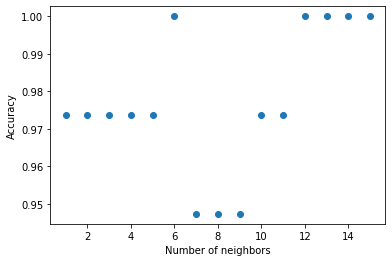

In [9]:
plt.scatter(num_neigh,accuracy)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

#### 위의 그래프에서 사용할 최적의 이웃 수는 몇입니까?

6이다. 가장 높은 정확도를 가진 모든 점 중 제일 낮은 숫자이기 때문

## 2.2 결정 트리(decision tree)

의사결정 트리도 과소적합되거나 과대적합될 수도 있다.
예를 들어, 트리에 1개의 결정 지점만 있는 경우 트리가 과소적합될 가능성이 있다. 반대로 트리에 여러 결정 지점이 있는 경우 트리가 과대적합될 수 있따. 따라서 트리가 깊을수록 트리가 과대적합될 가능성이 높아진다. 

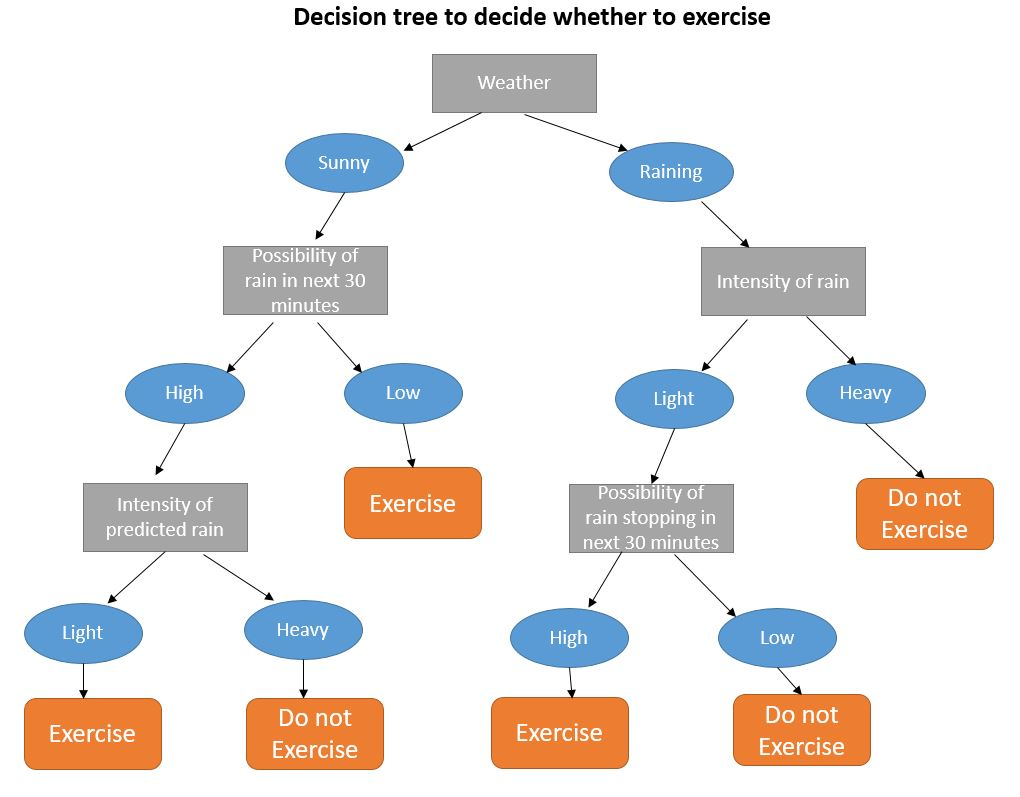
과대적합


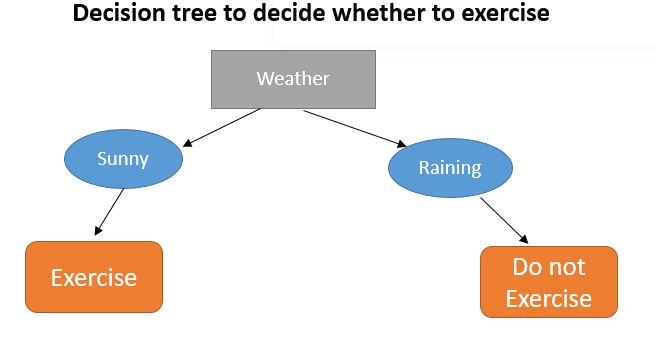

과소적합

의사 결정 트리가 Iris Flower 데이터 세트에 잘 맞도록 하는 최적의 매개변수 세트를 찾아보자! 위에서 사용한 분할 데이터 세트를 그대로 사용하여 아래의 코드를 실행할 것. 트리가 깊을수록 과대적합될 가능성이 높아진다.

In [11]:
# 각 의사 결정 트리에 대해 정확도와 가장 잘 테스트된 매개변수를 저장할 빈 목록을 만든다.
accuracy = []
depth = []

## ii를 사용하여 값 1에서 9까지 반복. 이것은 트리의 max_depth 값이 된다.
for ii in range(1,10):
  # max_depth를 ii로 설정
  dt = tree.DecisionTreeClassifier(max_depth = ii)
  # 데이터로 모델 훈련 또는 피팅
  dt.fit(X_train_scale, y_train)
  # .score는 테스트 데이터를 기반으로 모델의 정확도를 제공한다. 정확도를 목록에 저장함
  accuracy.append(dt.score(X_test_scale,y_test))
  # 목록에 max_depth 값 추가
  depth.append(ii)

print(accuracy)

[0.6052631578947368, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158]


정확도 그래프에 표시

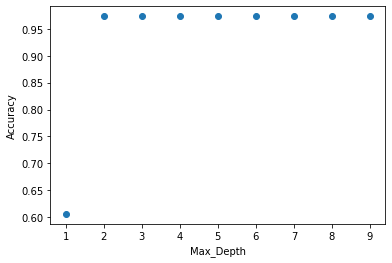

In [12]:
plt.scatter(depth, accuracy)
plt.xlabel("Max_Depth")
plt.ylabel("Accuracy")
plt.show()

래프에서 확인할 수 있는 최적의 max_depth 값은 무엇입니까?

2 이다. 숫자가 커질수록 과대적합이라 생각함

결정 지점에서 최소 샘플 수를 사용하여 과대적합 또는 과소적합을 방지할 수도 있다. 결정 트리 알고리즘에서 이 값은 min_samples_split에 의해 제어된다. 

최상의 min_samples_split 값을 찾아보세요. 2에서 15 사이의 범위를 사용할 수 있습니다.

In [15]:
accuracy = []
samples_split = []

# ii를 사용하여 2에서 15까지 반복. 이것은 의사결정 트리의 min_sample_split 값이 된다.
for ii in range(2,16):
  # min_samples_split ii로 설정
  dt = tree.DecisionTreeClassifier(min_samples_split = ii)
  # 데이터로 모델 훈련 또는 피팅
  dt.fit(X_train_scale, y_train)
  # .score는 테스트 데이터를 기반으로 모델의 정확도를 제공. 정확도를 목록에 저장
  accuracy.append(dt.score(X_test_scale, y_test))
  # 목록에 min_samples_split 값 추가
  samples_split.append(ii)

print(accuracy)

[0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158]


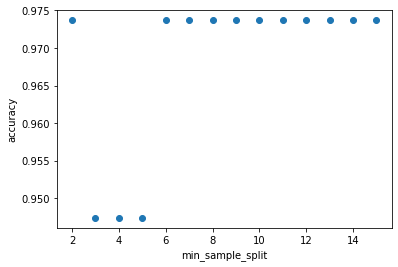

In [16]:
# 그래프로 표시
plt.scatter(samples_split, accuracy)
plt.xlabel("min_sample_split")
plt.ylabel("accuracy")
plt.show()

그래프에서 가장 좋은 min_samples_split 값은 무엇입니까? 가장 높은 정확도를 갖는 가장 낮은 값을 선택하겠습니까?

6이다. min_samples_split 값 2를 얻으려면 매우 깊게 여러 번 분할되어야 하기 때문에, 훈련에 사용하지 않은 테스트 데이터에 대하여 모델을 평가할 때 성능이나 정확도가 떨어져서 일반화하지 못할 수 있기 때문